In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import Counter
from operator import itemgetter

# set this so the 
%matplotlib inline

In [33]:
amazon = pd.read_csv('amazon_co-ecommerce_sample.csv', encoding='utf8')
amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\r\n ...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\r\n ...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


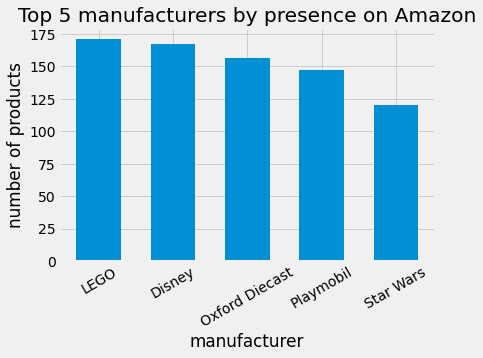

In [39]:

plt.style.use('fivethirtyeight')
with open('amazon_co-ecommerce_sample.csv', 'r', encoding='utf8') as csv_file:
    csv_reader= csv.reader(csv_file)
    next(csv_reader)
    list_of_manufacturers = []
    for line in csv_reader:
        list_of_manufacturers.append(line[2])
    counting_manu = Counter(list_of_manufacturers).most_common(5)

names_of_manufacturers = []
most_products = []
for i in counting_manu:
    names_of_manufacturers.append(i[0])
    most_products.append(i[1])

plt.bar(names_of_manufacturers, most_products, width = 0.6
       )
plt.ylabel('number of products')
plt.xlabel('manufacturers')
plt.xticks(rotation=30)
plt.title ('Top 5 manufacturers by presence on Amazon')

plt.show()

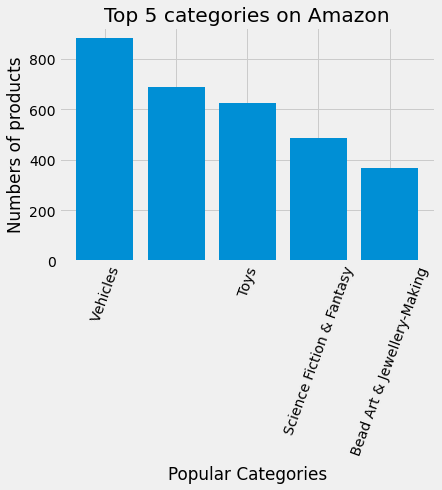

In [40]:
plt.style.use('fivethirtyeight')
with open('amazon_co-ecommerce_sample.csv', 'r', encoding='utf8') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    amazon_category_and_sub_category = []
    for items in csv_reader:
        amazon_category_and_sub_category.append(items[8].split('>'))

category = []
counter = 0
while counter < len(amazon_category_and_sub_category):
    for z in amazon_category_and_sub_category:
        category.append(amazon_category_and_sub_category[counter][-1])
        counter+=1
Couting_each = Counter(category).most_common(5)
numb = []
catg = []
for f in Couting_each:
    numb.append(f[1])
    catg.append(f[0])
plt.bar(catg, numb)
plt.xlabel('Popular Categories')
plt.ylabel('Numbers of products')
plt.xticks(rotation=70)
plt.title('Top 5 categories on Amazon')
plt.show()